<a href="https://colab.research.google.com/github/seansothey/MyProject/blob/master/Abalone_Rings_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Model

In [49]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor



In [50]:
# load the dataset
df = pd.read_csv("/content/abalone.csv")

In [51]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa83446d780>,
      dtype=object)

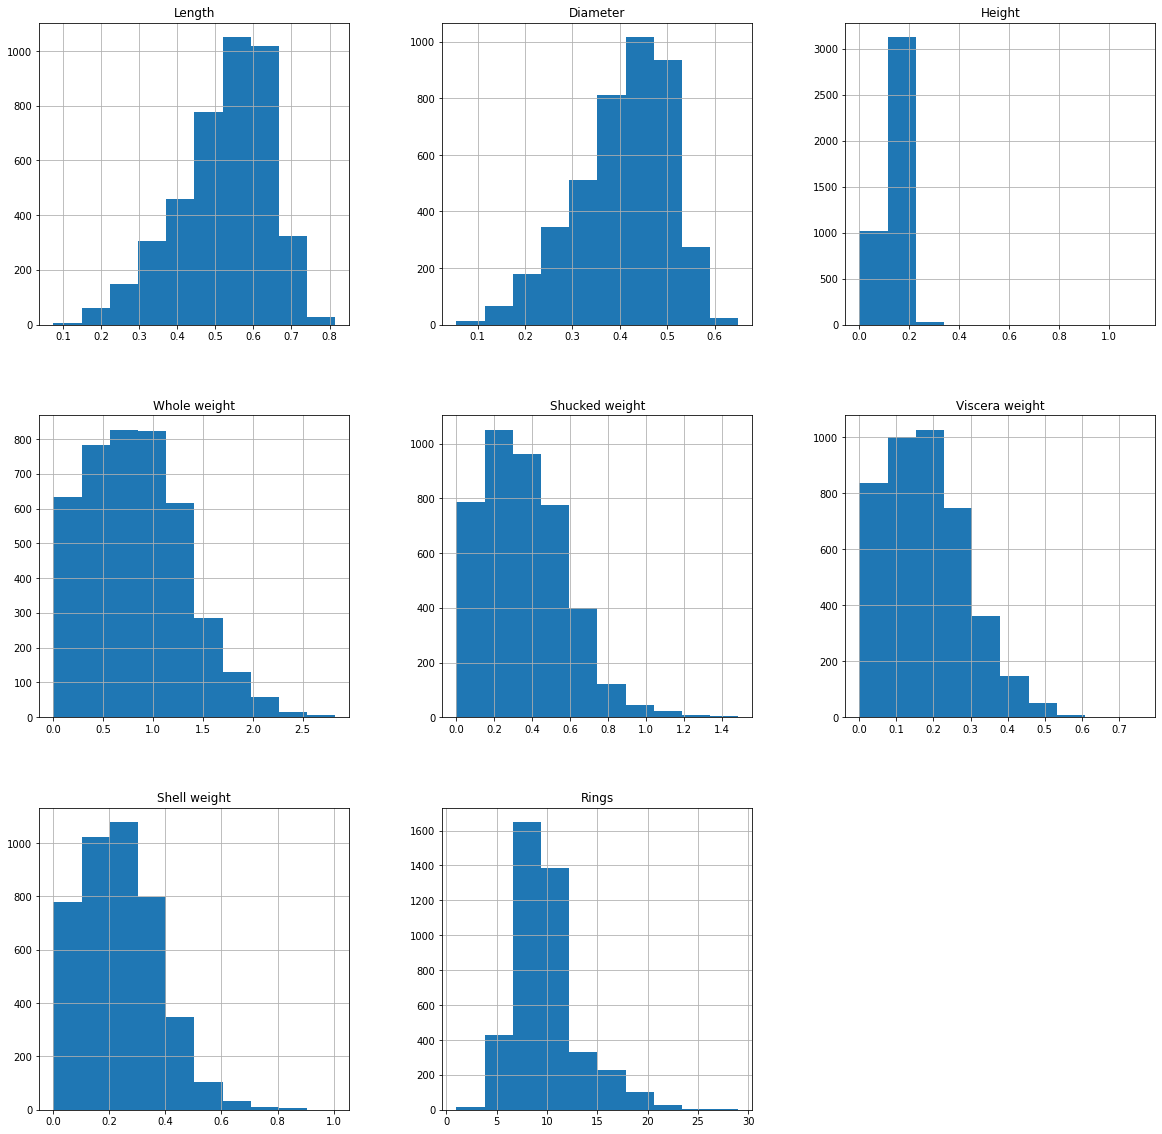

In [52]:
#See the data distribution
df.hist(figsize=(20,20))

In [53]:
# Check if there's missing data
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [54]:
# Scale the data X
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=[0,1])
#df.iloc[:, 1:7] = scaler.fit_transform(df.iloc[:, 1:7])

In [55]:
# Convert Sex column from catgory to numerical 
df = pd.get_dummies(df, columns=['Sex'])

In [56]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [57]:
# create X and y
X = df.drop(['Rings'], axis=1)
y = df['Rings']

In [58]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [59]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [96]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=42)

In [61]:
model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04,0.05],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [50,100,300,500],
              'max_depth'    : [4,6,8] 
              }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, n_jobs=-1, )
grid.fit(X_train, y_train)    

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [62]:
best_model = grid.best_estimator_
print(best_model)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [63]:
best_model.score(X_test, y_test)

0.5486267028280452

In [64]:
y_pred = best_model.predict(X_test)

In [65]:
rings = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rings

,Actual,Predicted
866,9,11.998183
1483,8,9.557083
599,16,14.570254
1702,9,10.414351
670,14,11.857334
...,...,...
3093,11,11.191935
1651,8,9.726637
2897,10,8.960310
3953,8,9.242184


#Decision Tree Model


In [67]:
# import libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline

In [97]:
# convert y labels to category
y_train = pd.cut(x=y_train, bins=[0, 5, 10, 15, 20, 25, 29], labels=['1-5', '6-10', '11-15', '16-20', '21-25', '26-29'])
y_test = pd.cut(x=y_test, bins=[0, 5, 10, 15, 20, 25, 29], labels=['1-5', '6-10', '11-15', '16-20', '21-25', '26-29'])

In [98]:
y_train

4038    11-15
1272     6-10
3384     6-10
3160     6-10
3894    11-15
        ...  
3444     6-10
466     11-15
3092    11-15
3772     6-10
860      6-10
Name: Rings, Length: 3341, dtype: category
Categories (6, object): ['1-5' < '6-10' < '11-15' < '16-20' < '21-25' < '26-29']

In [99]:
y_test

866      6-10
1483     6-10
599     16-20
1702     6-10
670     11-15
        ...  
3093    11-15
1651     6-10
2897     6-10
3953     6-10
1830     6-10
Name: Rings, Length: 836, dtype: category
Categories (6, object): ['1-5' < '6-10' < '11-15' < '16-20' < '21-25' < '26-29']

In [101]:
# build the decision tree model

def DT_GridSearchCV(X,y):
    #create a dictionary of all values we want to test
    param_grid = {
                  'ccp_alpha' : np.arange(0, 0.2, 0.01),
                  'criterion':['gini','entropy'],
                  #'max_depth': np.arange(4, 40, 2),
                  'splitter' : ['best', 'random'],
                  'max_features' : ['None', 'auto', 'sqrt', 'log2'],
                  'min_weight_fraction_leaf' : np.arange(0, 1, 0.1),
                  'class_weight' : ['None', 'balanced'],
                  'random_state' : np.arange(0, 101, 10)
                  }
    #decision tree model
    model_DT = DecisionTreeClassifier()
    #use gridsearch to test all values
    model_gs = GridSearchCV(model_DT, param_grid, cv=5, verbose=0, n_jobs=-1)
    #fit model with data
    model_gs.fit(X, y)
    return model_gs.best_estimator_

In [102]:
best_model = DT_GridSearchCV(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [103]:
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')


In [104]:
best_model.score(X_test, y_test)

0.6148325358851675

In [105]:
class_names = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-29']

In [ ]:
# plot the decision tree after pruning 
plt.figure(figsize=(12, 8))
plot_tree(best_model,
          filled=True,
          rounded=True,
          class_names= class_names,
          feature_names=X.columns)

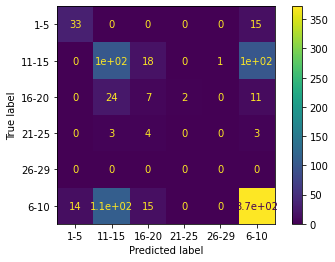

In [107]:
# see the confustion matrix
plot_confusion_matrix(best_model, X_test, y_test)